In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
import batman
import numpy as np
from scipy import signal
from sklearn.decomposition import FastICA, PCA
from pandas import DataFrame

In [212]:
import scipy.io as sio
import glob

In [213]:
def init_plotting():
    plt.rcParams['figure.figsize'] = (14.0,8.0)
    plt.rcParams['font.size'] = 10
    #plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 2*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.65*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 1

init_plotting()

In [214]:
matlab_binaries = glob.glob('*.mat')

In [215]:
matlab_binaries

['synth_observations_example.mat']

In [216]:
data = sio.loadmat('synth_observations_example.mat')

In [217]:
data.keys()

dict_keys(['Wmatrix', 'Wwasobi', '__version__', 'ISRefica', 'ans', 'nonseparablecomponents', 'Norm_ISR', 'ISRwasobi', 'X', '__header__', 'Wefica', 'result', '__globals__'])

In [218]:
data.items()

dict_items([('Wmatrix', array([[  79.8998233 ,   81.14882374],
       [ 771.73355425, -822.42057578]])), ('Wwasobi', array([[  79.8998233 ,   81.14882374],
       [ 771.73355425, -822.42057578]])), ('__version__', '1.0'), ('ISRefica', array([[ 0.        ,  0.00058204],
       [ 0.00800041,  0.        ]])), ('ans', array([[1000]], dtype=uint16)), ('nonseparablecomponents', array([], shape=(0, 0), dtype=uint8)), ('Norm_ISR', array([[ 0.00213211]])), ('ISRwasobi', array([[ 0.        ,  0.00012067],
       [ 0.00835373,  0.        ]])), ('X', array([[ 1.00474317,  1.00343531,  1.00381238,  1.00499561,  1.00481519,
         1.00206628,  1.00381681,  1.00258773,  1.00280457,  1.00346308,
         1.00304311,  1.00419696,  1.00363654,  1.0031705 ,  1.00337828,
         1.00307977,  1.00433796,  1.00283231,  1.00327969,  1.0019026 ,
         1.00024815,  1.00367609,  1.00386174,  1.00203557,  1.00505808,
         1.00153831,  1.00306483,  1.00261854,  1.00429777,  1.00444175,
         1.002942

In [219]:
Norm = (data['ISRwasobi'].mean() + data['ISRefica'].mean()) / 2.

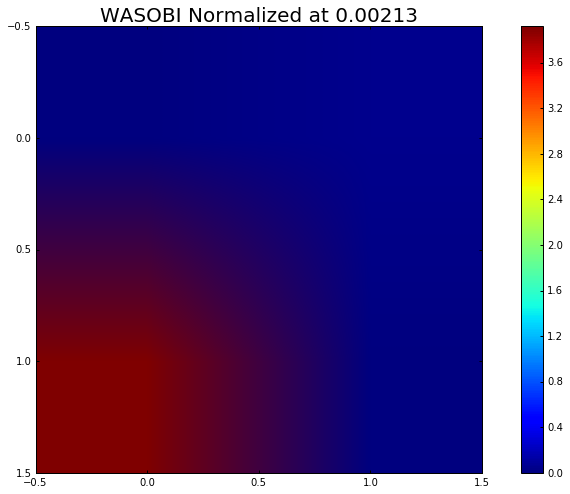

In [220]:
#plt.grid()
plt.imshow(data['ISRwasobi']/Norm)
plt.colorbar()
plt.title('WASOBI Normalized at '+str(round(Norm,5)))

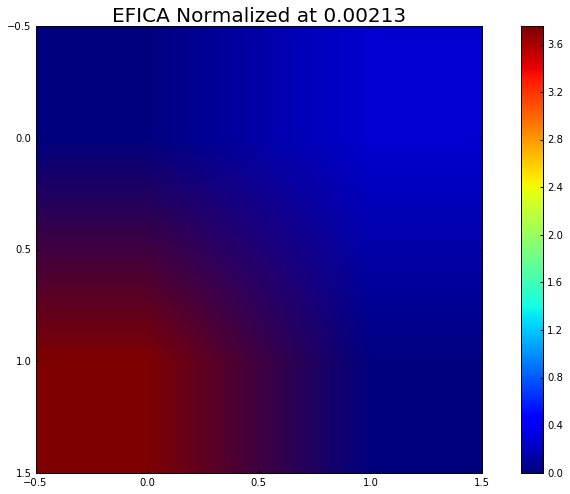

In [221]:
# plt.grid()
plt.imshow(data['ISRefica']/Norm)
plt.colorbar()
plt.title('EFICA Normalized at '+str(round(Norm,5)))

In [222]:
result = data['result']

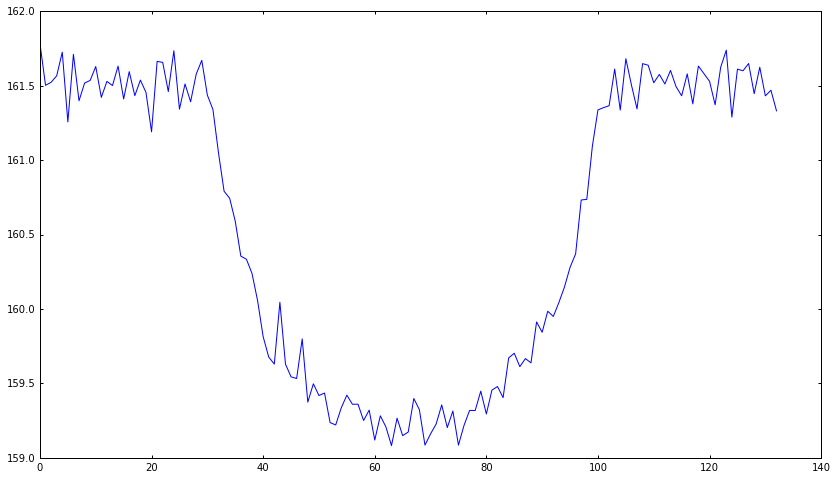

In [223]:
plt.plot(result[0])

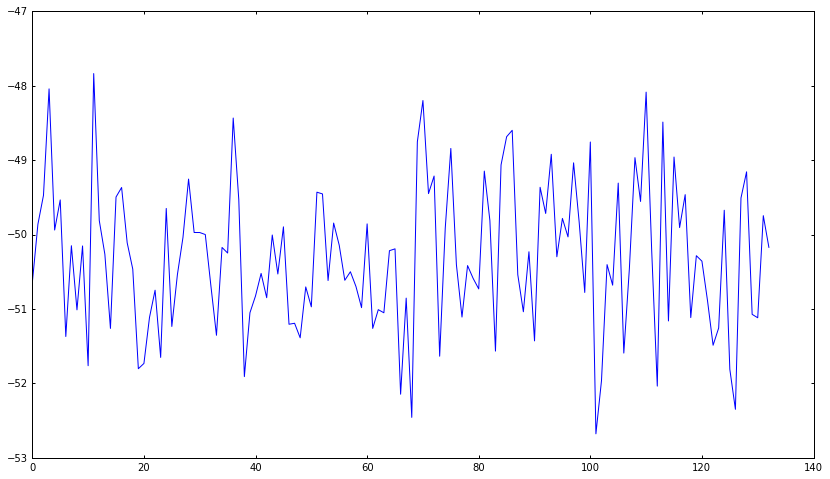

In [224]:
plt.plot(result[1])

In [225]:
Sa = result[0]

In [226]:
W = data['Wmatrix'] #de-mixing matrix

In [227]:
print(W)

[[  79.8998233    81.14882374]
 [ 771.73355425 -822.42057578]]


In [228]:
lcsignals = np.outer(W[1],Sa).T

In [229]:
lcsignals = DataFrame(lcsignals)

In [230]:
lcsignals

,0,1
0,124854.727523,-133055.115115
1,124637.425129,-132823.540423
2,124653.202870,-132840.354437
3,124686.781528,-132876.138523
4,124809.521421,-133006.939902
5,124447.676778,-132621.329508
6,124798.282232,-132994.962529
7,124557.340182,-132738.195543
8,124649.098404,-132835.980392
9,124662.976367,-132850.769852


In [231]:
lcsignals = lcsignals/lcsignals.median()

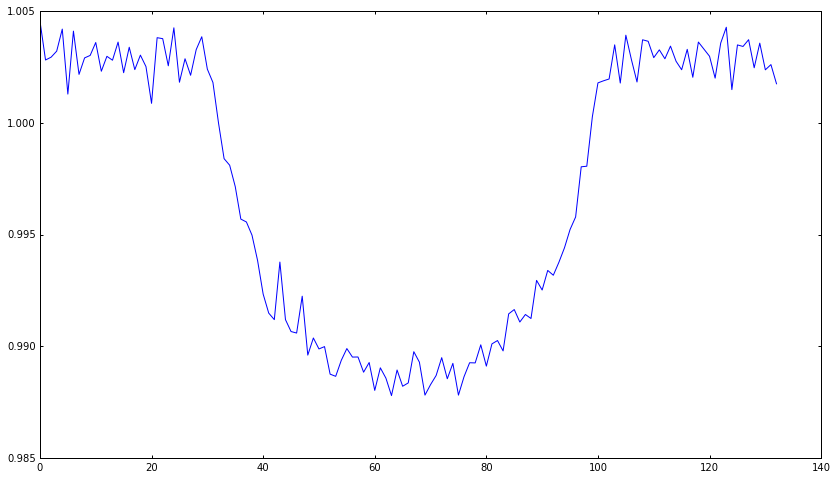

In [232]:
plt.plot(lcsignals[0])

In [233]:
data['X']

array([[ 1.00474317,  1.00343531,  1.00381238,  1.00499561,  1.00481519,
         1.00206628,  1.00381681,  1.00258773,  1.00280457,  1.00346308,
         1.00304311,  1.00419696,  1.00363654,  1.0031705 ,  1.00337828,
         1.00307977,  1.00433796,  1.00283231,  1.00327969,  1.0019026 ,
         1.00024815,  1.00367609,  1.00386174,  1.00203557,  1.00505808,
         1.00153831,  1.00306483,  1.00261854,  1.00429777,  1.00444175,
         1.00294203,  1.00230835,  1.        ,  0.99792961,  0.99837243,
         0.99733692,  0.99698198,  0.99615535,  0.99404221,  0.99341479,
         0.99200298,  0.99131381,  0.99080592,  0.99400095,  0.99100694,
         0.99085795,  0.98996036,  0.9916726 ,  0.98882517,  0.99004922,
         0.98937384,  0.99045546,  0.98916732,  0.98833023,  0.98955643,
         0.98991471,  0.98922287,  0.98929922,  0.98847107,  0.98873903,
         0.98816163,  0.98831686,  0.98799897,  0.98716574,  0.98887641,
         0.98814053,  0.98705971,  0.98932052,  0.9

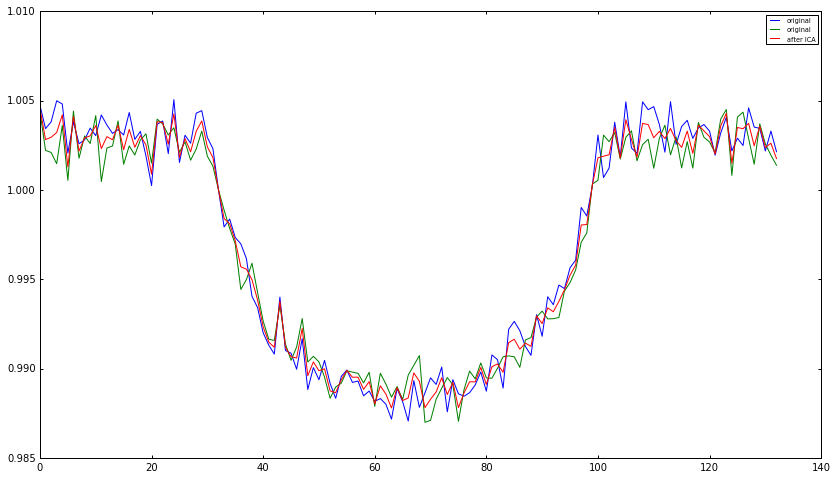

In [234]:
plt.plot(data['X'].T, label='original')
plt.plot(lcsignals[0],label='after ICA')
plt.legend()
plt.savefig('comparing_lc.pdf')

In [235]:
lcsignals[0].values

array([ 1.00457075,  1.00282235,  1.0029493 ,  1.00321947,  1.00420702,
        1.00129565,  1.00411659,  1.00217799,  1.00291627,  1.00302793,
        1.00360738,  1.00231957,  1.00298741,  1.00281331,  1.00362515,
        1.00225382,  1.00339418,  1.0023908 ,  1.00304116,  1.00252702,
        1.00088056,  1.00382248,  1.00377876,  1.00256285,  1.0042646 ,
        1.00182615,  1.00287795,  1.00213871,  1.00328622,  1.00386553,
        1.00241264,  1.00181525,  1.        ,  0.99840221,  0.99810788,
        0.99715044,  0.99569484,  0.99556533,  0.99497573,  0.99384174,
        0.99233528,  0.99148232,  0.99119007,  0.99376969,  0.99118966,
        0.99065702,  0.99058943,  0.9922404 ,  0.98960105,  0.99036818,
        0.98987763,  0.98998162,  0.9887479 ,  0.98865005,  0.98936483,
        0.98989435,  0.98951288,  0.98951656,  0.98883565,  0.98926929,
        0.98802008,  0.98903133,  0.98856881,  0.98778726,  0.98893336,
        0.98820519,  0.98835504,  0.98975429,  0.98928586,  0.98

In [236]:
result_master = DataFrame([lcsignals[1].values,data['X'][0],data['X'][1]]).T

In [237]:
result_master.columns = ['signal','obs1','obs2']

In [238]:
result_master

,signal,obs1,obs2
0,1.004571,1.004743,1.004401
1,1.002822,1.003435,1.002219
2,1.002949,1.003812,1.002099
3,1.003219,1.004996,1.001471
4,1.004207,1.004815,1.003608
5,1.001296,1.002066,1.000537
6,1.004117,1.003817,1.004412
7,1.002178,1.002588,1.001775
8,1.002916,1.002805,1.003026
9,1.003028,1.003463,1.002599


In [239]:
result_master.to_csv('results.ica.csv',index_label=False)